# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "/home/ababil/BUET/AV/csv"
# dataDir = "C:/Users/Zenbook325E/Downloads/csv"
dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2"

In [2]:
exec(open('init_notebook.py').read())

current working dirF:\behavior-hypothesis\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from behavior_tools.TrajectoryADECalculator import TrajectoryADECalculator
from behavior_tools.Sampler import Sampler
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
sceneId = 210
date = "2023-05-04"
fps=10
minYDisplacement = 5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

In [6]:
visualizer = TrajectoryVisualizer()
adeCalculator = TrajectoryADECalculator()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity',
        xAccCol='sceneXAcceleration',
        yAccCol='sceneYAcceleration',
        speedCol='speed',
        accelerationCol='acceleration',
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minAcceleration = 0.0,
    maxAcceleration = 2.0,   
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
transformer.deriveAcceleration(pedDf)
# plt.boxplot(pedDf['displacementY'])
# plt.show()
# plt.boxplot(pedDf['speed'])
# plt.show()
# plt.boxplot(pedDf['acceleration'])
# plt.show()

In [7]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)

# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())
transformer.translateAllToLocalSource(cleanPedDf)

southIds = []
for pedId in allPedIds:
    trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
    trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
    # print(trackMeta['verticalDirection'])
    if trackMeta['verticalDirection'] == "SOUTH":
        southIds.append(pedId)
        # print(trackMeta["uniqueTrackId"])
        X, Y = transformer.rotate(trackDf)
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y
len(cleanPedDf)


using min Y displacement (5)


7600

In [84]:

startingDf = cleanPedDf[cleanPedDf["displacementY"] < 1].copy()
midDf = cleanPedDf[(cleanPedDf["displacementY"] >= 1) & (cleanPedDf["displacementY"] < 4)].copy()
endDf = cleanPedDf[(cleanPedDf["displacementY"] >= 4)].copy()
startingDf.head(10)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,acceleration,localX,localY
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000,0.053387,-0.000000,-0.000000
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163,0.044655,-0.007742,0.096163
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480,0.028862,-0.015521,0.193480
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789,0.029173,-0.023915,0.291789
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772,0.010180,-0.032553,0.389772
5,18,760,18023,210,5.0,0.670135,1.967831,-0.040911,0.486252,-0.011395,0.018314,0.487970,0.040735,0.487023,0.021570,-0.040735,0.487023
6,18,762,18023,210,5.0,0.679707,1.870670,-0.047861,0.485808,0.034750,0.002224,0.488159,0.050307,0.584184,0.034821,-0.050307,0.584184
7,18,764,18023,210,5.0,0.690215,1.773153,-0.052542,0.487584,0.023403,-0.008883,0.490407,0.060815,0.681701,0.025032,-0.060815,0.681701
8,18,766,18023,210,5.0,0.701232,1.674626,-0.055084,0.492634,0.012713,-0.025248,0.495704,0.071832,0.780228,0.028268,-0.071832,0.780228
9,18,768,18023,210,5.0,0.712428,1.575365,-0.055981,0.496305,0.004481,-0.018357,0.499452,0.083028,0.879489,0.018896,-0.083028,0.879489


In [9]:
# plt.boxplot(startingDf["speed"])

In [10]:
# get the pedestrians who started at almost 0 speed.
# get pedestrians who started at almost the median speed.
medianStartingSpeed = startingDf["speed"].median()
medianStartingVelocityDf = startingDf[abs(startingDf["speed"] - medianStartingSpeed) < 0.005].copy()
medianStartingVelocityPedIds = list(medianStartingVelocityDf["uniqueTrackId"].unique())
# medianStartingVelocityPedIds

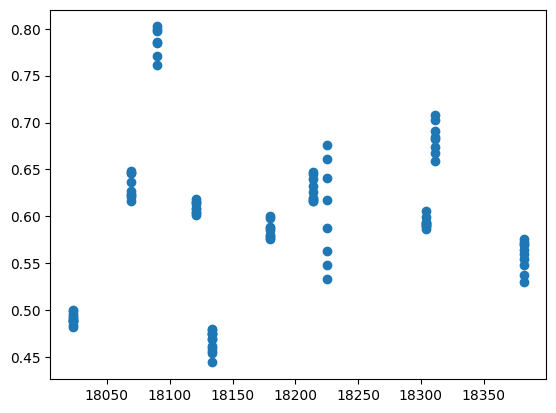

In [11]:
allPedIds
startingEditedDf = startingDf[startingDf["uniqueTrackId"] < 18500].copy()
plt.scatter(startingEditedDf["uniqueTrackId"], startingEditedDf["speed"])
# plt.show()

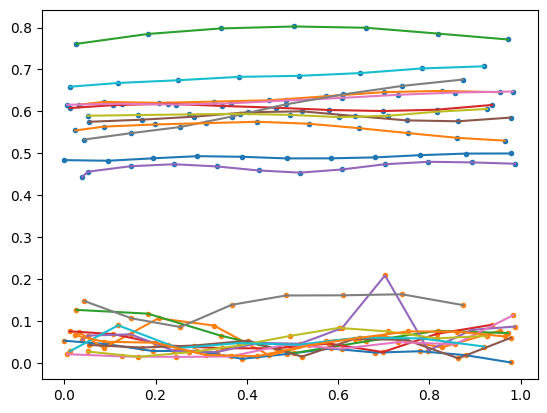

In [12]:

plt.scatter(startingEditedDf["displacementY"], startingEditedDf["speed"], marker = ".")


        
uniqueTrackId_collection = {} 

for pedId in allPedIds:
    uniqueTrackId_collection[pedId] = startingEditedDf[startingEditedDf["uniqueTrackId"] == pedId].copy()
    plt.plot(uniqueTrackId_collection[pedId]["displacementY"], uniqueTrackId_collection[pedId]["speed"])
# plt.show()
plt.scatter(startingEditedDf["displacementY"], startingEditedDf["acceleration"], marker = ".")
for pedId in allPedIds:
    uniqueTrackId_collection[pedId] = startingEditedDf[startingEditedDf["uniqueTrackId"] == pedId].copy()
    plt.plot(uniqueTrackId_collection[pedId]["displacementY"], uniqueTrackId_collection[pedId]["acceleration"])
# plt.show()

In [ ]:
midDf = cleanPedDf[(cleanPedDf["displacementY"] >= 1) & (cleanPedDf["displacementY"] < 4)].copy()
visualizer.show(midDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [ ]:
plt.boxplot(midDf["speed"])

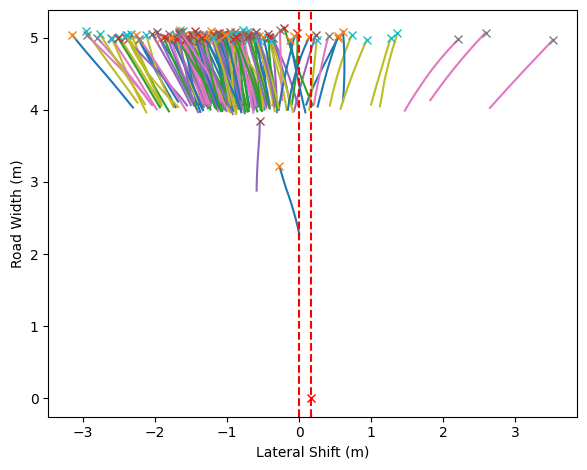

In [82]:
endDf = cleanPedDf[(cleanPedDf["displacementY"] >= 4)].copy()
visualizer.show(endDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [ ]:
plt.boxplot(endDf["speed"])

In [ ]:
sns.histplot(endDf["speed"])

In [ ]:
trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"]==18023]
ade = adeCalculator.getADE(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
ade

In [ ]:
aade = adeCalculator.getADE(startingDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
aade

In [48]:
sampler = Sampler()
sampleDf = sampler.getRandom(startingDf, idCol = 'uniqueTrackId', n=10)
aade = adeCalculator.getADE(sampleDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
aade

0.0788960062619717

<AxesSubplot: >

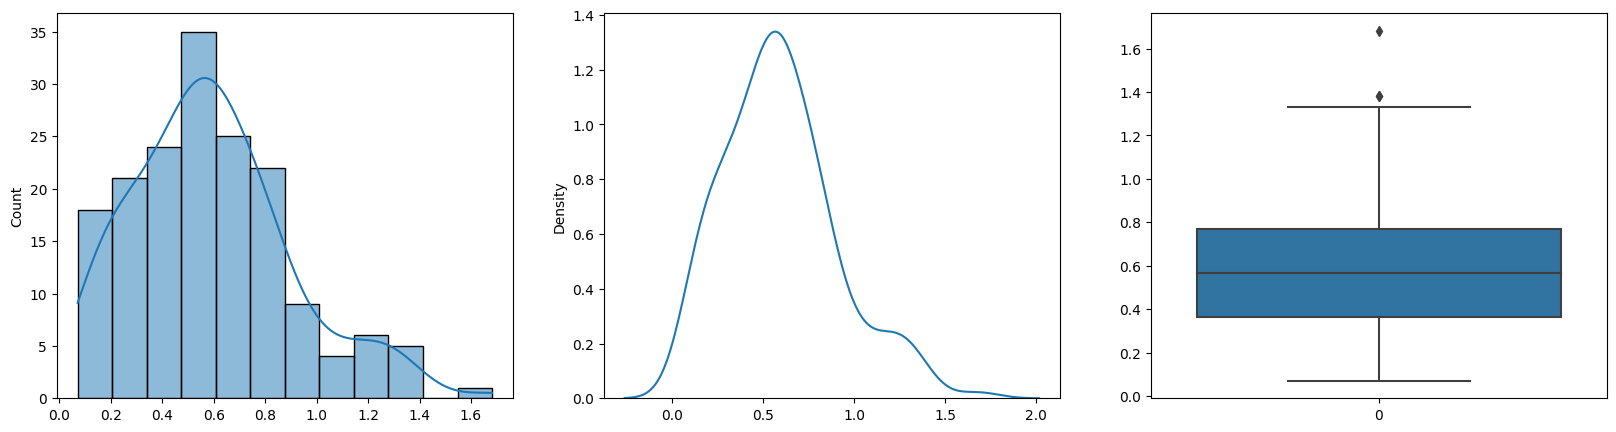

In [81]:
ades = adeCalculator.getADEs(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(ades, kde='true', ax=axs[0])
sns.kdeplot(ades, ax=axs[1])
sns.boxplot(ades, ax=axs[2])

<AxesSubplot: >

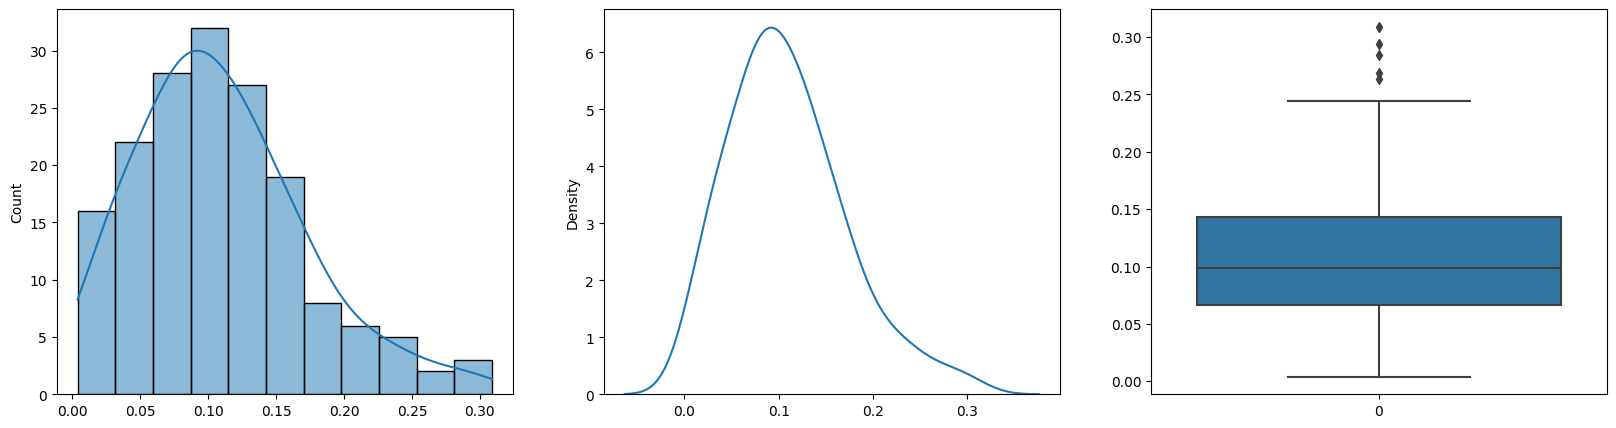

In [80]:
ades = adeCalculator.getADEs(startingDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')


fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(ades, kde='true', ax=axs[0])
sns.kdeplot(ades, ax=axs[1])
sns.boxplot(ades, ax=axs[2])

<AxesSubplot: >

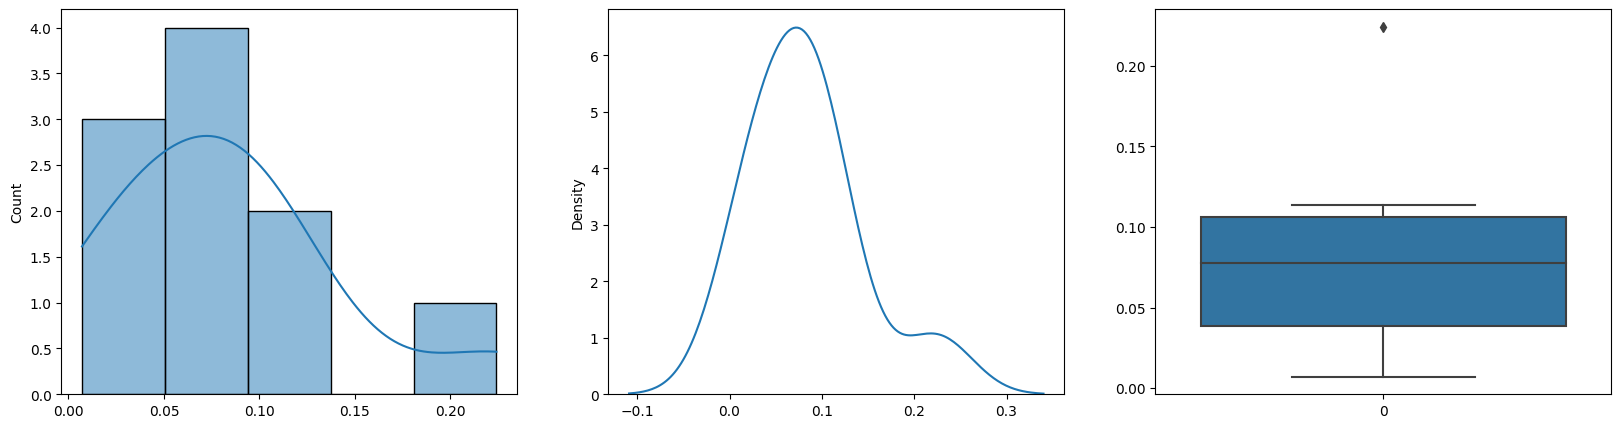

In [83]:
ades = adeCalculator.getADEs(sampleDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(ades, kde='true', ax=axs[0])
sns.kdeplot(ades, ax=axs[1])
sns.boxplot(ades, ax=axs[2])

<AxesSubplot: >

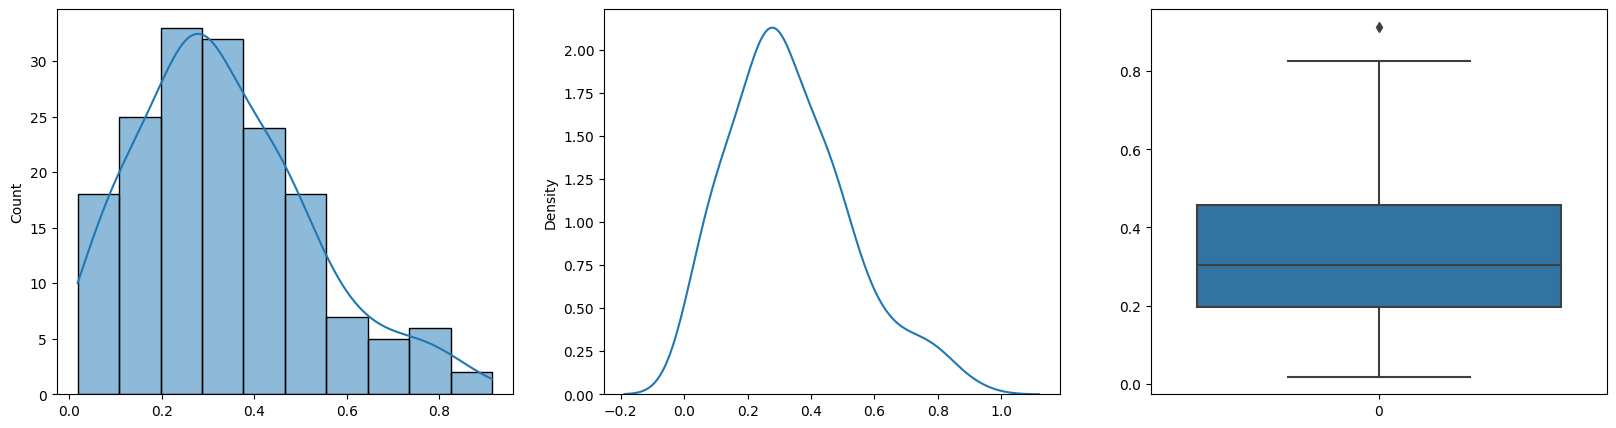

In [85]:
ades = adeCalculator.getADEs(midDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')


fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(ades, kde='true', ax=axs[0])
sns.kdeplot(ades, ax=axs[1])
sns.boxplot(ades, ax=axs[2])

<AxesSubplot: >

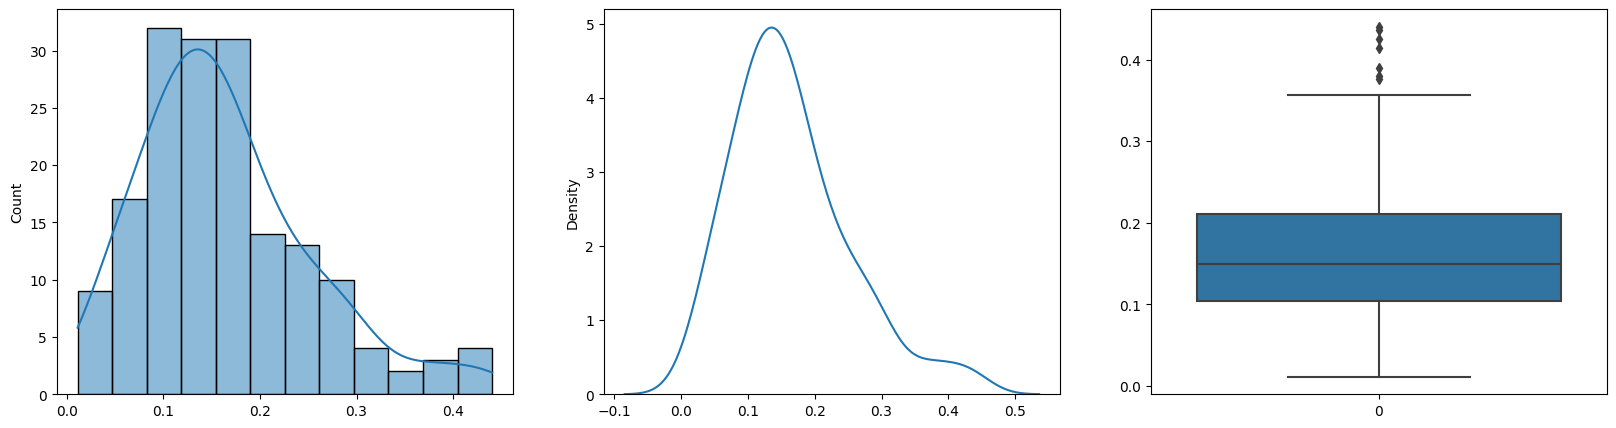

In [86]:
ades = adeCalculator.getADEs(endDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(ades, kde='true', ax=axs[0])
sns.kdeplot(ades, ax=axs[1])
sns.boxplot(ades, ax=axs[2])